## Credit EDA Case Study

### Introduction

In this case study, we will apply the techniques of Exploratory Data Analysis and also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Importing the necessary python libraries to perform EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

#### Understanding Data

There are 2 datasets explained below:

1. **'application_data.csv'** contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

2. **'previous_application.csv'** contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [2]:
appdata = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Credit Case Study\application_data.csv')
prevdata = pd.read_csv(r'C:\Users\Vishu\Documents\Python Workspace\DATASETS\Credit Case Study\previous_application.csv')

In [3]:
#Check the shape of the application data 
appdata.shape

(307511, 122)

In [4]:
#Check the shape of the previous application data 
prevdata.shape

(1670214, 37)

In [5]:
#Number of features on application data
len(appdata.columns)

122

In [6]:
#Number of features on previous application data
len(prevdata.columns)

37

In [7]:
# Number of each type of column in application data
appdata.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
# Number of each type of column in previous application data
prevdata.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [9]:
# Number of unique classes in each object column in application data
appdata.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [10]:
# Number of unique classes in each object column in previous application data
prevdata.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [11]:
appdata.head()    

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [12]:
prevdata.head()    

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#descriptive statistics of the application data
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [14]:
#descriptive statistics of the previous application data
prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### EDA APPLICATION DATA

#### Data Cleaning and Manipulation

In [15]:
#It seems the DAYS_BIRTH column values are recorded negative relative to the current loan application. For ease of analysis converting the DAYS_BIRTH to positive values
appdata['DAYS_BIRTH']=abs(appdata['DAYS_BIRTH'])

In [16]:
#Converting the DAYS_BIRTH to years and checking the descriptive statistics of the column.
(appdata['DAYS_BIRTH'] / 365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

No anamolies found on the DATE_BIRTH field.

In [17]:
#Similar to DAYS_BIRTH column converting the DAYS_EMPLOYED to positive values
appdata['DAYS_EMPLOYED']=abs(appdata['DAYS_EMPLOYED'])

In [18]:
#Descriptive statistics of the DAYS_EMPLOYED field
appdata['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The max value 365243 doesn't seems to be correct.

In [19]:
#Converting the DAYS_EMPLOYED to years and checking the descriptive statistics of the column.
(appdata['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

There seems to be some anamolies in the DAYS_EMPLOYED field. The max value in years is 1000 doesn't look realistic. 


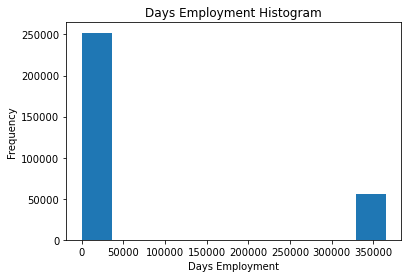

In [20]:
#plotting the histogram of the DAYS_EMPLOYED field
appdata['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
#understanding how the DAYS_EMPLOYED is impacting the TARGET variable
anomalies = appdata[appdata['DAYS_EMPLOYED'] == 365243]
non_anomalies = appdata[appdata['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anomalies['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anomalies['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anomalies))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


We can either replace the max value of DAYS_EMPLOYED with nan values or we can impute it with the median.

In [22]:
#converting negative values of DAYS_REGISTRATION to positive values
appdata['DAYS_REGISTRATION']=abs(appdata['DAYS_REGISTRATION']).astype('int64')

In [23]:
appdata['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120327
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

No anamolies found on the DAYS_REGISTRATION field

In [24]:
#converting negative values of DAYS_ID_PUBLISH to positive values
appdata['DAYS_ID_PUBLISH']=abs(appdata['DAYS_ID_PUBLISH'])

In [25]:
appdata['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

No anamolies found on the DAYS_ID_PUBLISH field

In [26]:
#Converting the OWN_CAR_AGE to integer
appdata['OWN_CAR_AGE']=appdata['OWN_CAR_AGE'].astype('Int64')

In [27]:
appdata['OWN_CAR_AGE'].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

No anamolies found on the OWN_CAR_AGE field

In [28]:
#Converting all the below fields to integer values
appdata['OBS_30_CNT_SOCIAL_CIRCLE']=appdata['OBS_30_CNT_SOCIAL_CIRCLE'].astype('Int64')
appdata['DEF_30_CNT_SOCIAL_CIRCLE']=appdata['DEF_30_CNT_SOCIAL_CIRCLE'].astype('Int64')
appdata['OBS_60_CNT_SOCIAL_CIRCLE']=appdata['OBS_60_CNT_SOCIAL_CIRCLE'].astype('Int64')
appdata['DEF_60_CNT_SOCIAL_CIRCLE']=appdata['DEF_60_CNT_SOCIAL_CIRCLE'].astype('Int64')

No anamolies found on OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE fields.

In [29]:
#Converting DAYS_LAST_PHONE_CHANGE to positive values and then integer data type 
appdata['DAYS_LAST_PHONE_CHANGE']=abs(appdata['DAYS_LAST_PHONE_CHANGE']).astype('Int64')

In [30]:
appdata['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

No anamolies found on DAYS_LAST_PHONE_CHANGE field

In [31]:
#converting all the below to integer data type
appdata['AMT_REQ_CREDIT_BUREAU_HOUR']=appdata['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('Int64')
appdata['AMT_REQ_CREDIT_BUREAU_DAY']=appdata['AMT_REQ_CREDIT_BUREAU_DAY'].astype('Int64')
appdata['AMT_REQ_CREDIT_BUREAU_WEEK']=appdata['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('Int64')
appdata['AMT_REQ_CREDIT_BUREAU_MON']=appdata['AMT_REQ_CREDIT_BUREAU_MON'].astype('Int64')
appdata['AMT_REQ_CREDIT_BUREAU_QRT']=appdata['AMT_REQ_CREDIT_BUREAU_QRT'].astype('Int64')
appdata['AMT_REQ_CREDIT_BUREAU_YEAR']=appdata['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('Int64')

No anamolies found on all the above fields.

#### Distribution of the TARGET variable

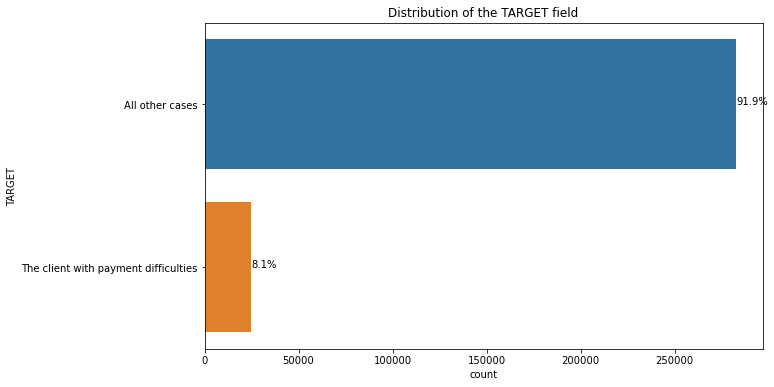

In [32]:
plt.figure(figsize=(10,6))
plt.title('Distribution of the TARGET field')
ax=sns.countplot(y ='TARGET',data=appdata)
labels=['All other cases','The client with payment difficulties']
ax.set_yticklabels(labels)
total = len(appdata['TARGET'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

The data is highly imbalanced, it seems 91.9% of the customers are repaying the loans and only 8.1% of the customers are defaulters.

#### Missing Value Percentage

In [33]:
result = appdata.isnull().sum().sort_values(ascending = False)
result=result[result>0]
percent = (appdata.isnull().sum()/appdata.isnull().count()*100).sort_values(ascending = False)
percent=percent[percent>0]
appdata_missing  = pd.concat([result, percent], axis=1, keys=['Result', 'Percent'])
appdata_missing

,Result,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


#### Correlations

In [34]:
correlations = appdata.dropna().corr()['TARGET'].sort_values()

# Display top 15 positive and negative correlations
print('Most Positive Correlations:\n\n', correlations.tail(15))
print('\nMost Negative Correlations:\n\n', correlations.head(15))

Most Positive Correlations:

 AMT_REQ_CREDIT_BUREAU_QRT      0.016465
DEF_60_CNT_SOCIAL_CIRCLE       0.020796
FLAG_DOCUMENT_7                0.021218
DEF_30_CNT_SOCIAL_CIRCLE       0.022807
OWN_CAR_AGE                    0.028052
OBS_60_CNT_SOCIAL_CIRCLE       0.030730
OBS_30_CNT_SOCIAL_CIRCLE       0.031041
AMT_REQ_CREDIT_BUREAU_YEAR     0.033832
REGION_RATING_CLIENT           0.053614
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT_W_CITY    0.061214
TARGET                         1.000000
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_4                     NaN
Name: TARGET, dtype: float64

Most Negative Correlations:

 EXT_SOURCE_3           -0.150720
EXT_SOURCE_2           -0.130969
EXT_SOURCE_1           -0.129548
DAYS_EMPLOYED          -0.062950
FLOORSMAX_AVG          -0.046110
FLOORSMAX_MODE         -0.045990
FLOORSMAX_MEDI         -0.045206
DAYS_BIRTH             -0.041108
AMT_INCOME_TOTAL       -0.039762
FLOORSMIN_MED

It seems all the positive correalations are almost equal to zero.
From the above correlation values and EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1 and DAYS_BIRTH are the top variables having some negative correlation with the target variable.


In [35]:
# Extracting the EXT_SOURCE and DATE_BIRTH variables and showing the correlations
extract_data = appdata[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
extract_data_corrs = extract_data.corr()
extract_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


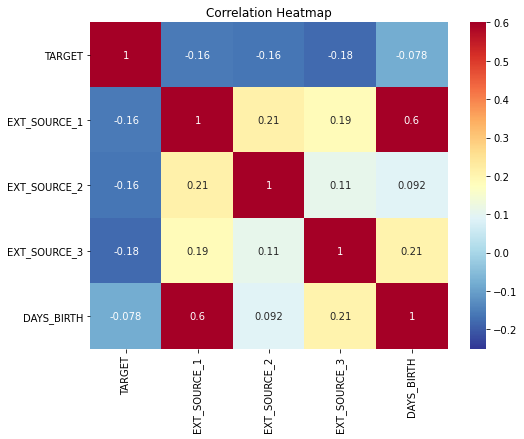

In [36]:
# Heatmap of the above correlations
plt.figure(figsize = (8, 6))
sns.heatmap(extract_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

From the above heat map, It is understood that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that there is some relationship with the client age.

##### Anlysis of the DATE_BIRTH on TARGET variable

There is a negative correlation of -0.07823 which is not much but still one of the high correalted variable with respect to the 
given application dataset. It seems the older clients tend to repay their loans on time more often.

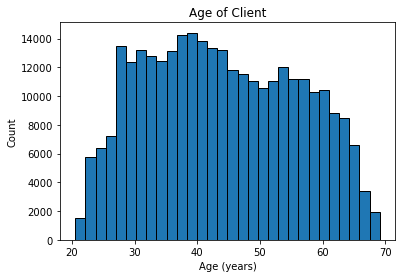

In [37]:
#lets see the distribution of the DAYS_BIRTH in age 
plt.hist(appdata['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 30)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

The distribution is not giving much information further lets plot kde plots with respect to the target variable. The age range seems to be between 20 and 70.

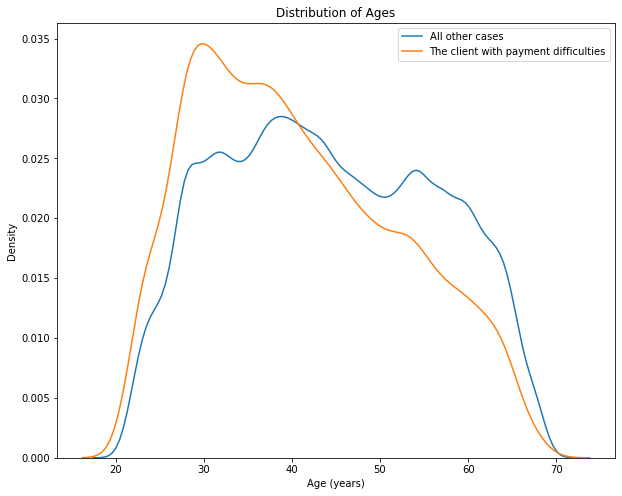

In [38]:
#seaborn KDE plots to understand the effect of age variable on the target variable.
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot(appdata.loc[appdata['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'All other cases')
# KDE plot of loans which were not repaid on time
sns.kdeplot(appdata.loc[appdata['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'The client with payment difficulties')
plt.legend(loc='best')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.show()

The target == 1 (The client with payment difficulties) curve skews towards the younger end of the range. 
Let's look at this relationship in another way: average failure to repay loans by age bucket. 
Let's make a new bar graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [39]:
# Age information into a separate dataframe
age_data = appdata[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [40]:
# Group by the bin and calculate the mean 
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


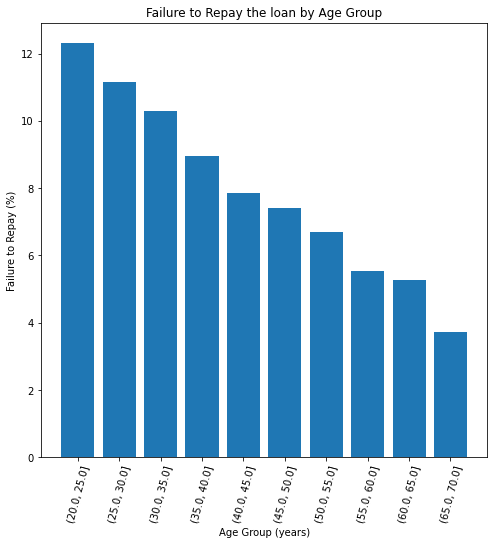

In [41]:
# Graph the age bins and the average of the target as a bar plot
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay the loan by Age Group')
plt.show()

It seems younger applicants are more likely to not repay the loan on time. The failure rate is above 10% for the youngest three age groups and below 5% for the oldest age group.



#### Analysis of the EXT_SOURCE_1,2,3, variables with respect to the targer variable

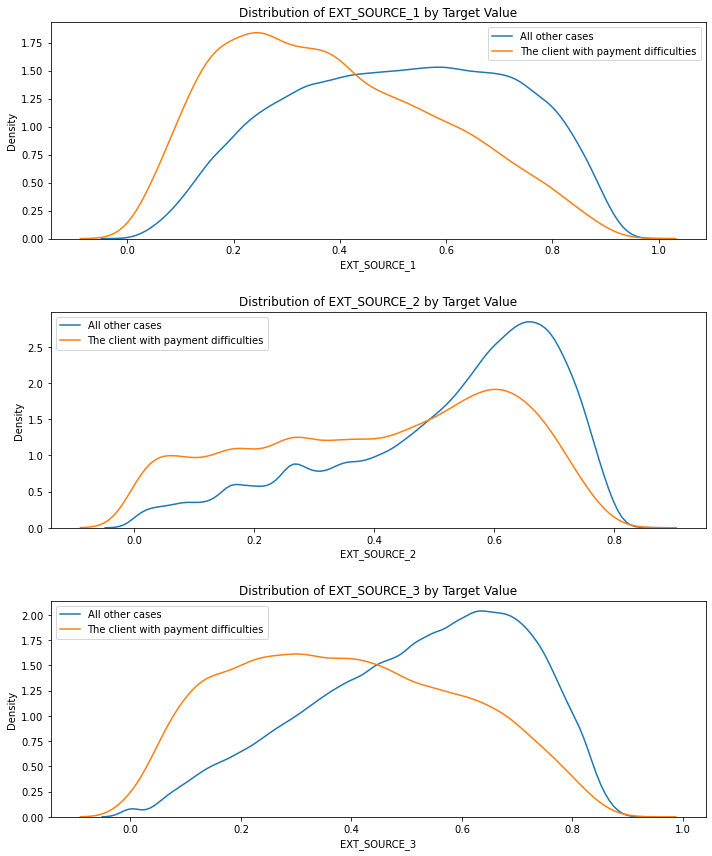

In [42]:
# iterate through the sources 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'
plt.figure(figsize = (10, 12))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot for non defaulters
    sns.kdeplot(appdata.loc[appdata['TARGET'] == 0, source], label = 'All other cases')
    # plot defaulters
    sns.kdeplot(appdata.loc[appdata['TARGET'] == 1, source], label = 'The client with payment difficulties')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend(loc='best')
    
plt.tight_layout(h_pad = 2.5)
plt.show()

All three variables 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3' seems to have strong negative correlations with resect to the target varibale. All these features represent normalized score from external data source. There is not much information is given to understand the meaning of these variables. These variables seems be a important factors as these are having strong negative correation with respect to the target variable in the given data set.

It is also indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.

#### Pairs plot of the EXT_SOURCE variables and the DAYS_BIRTH variable

Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

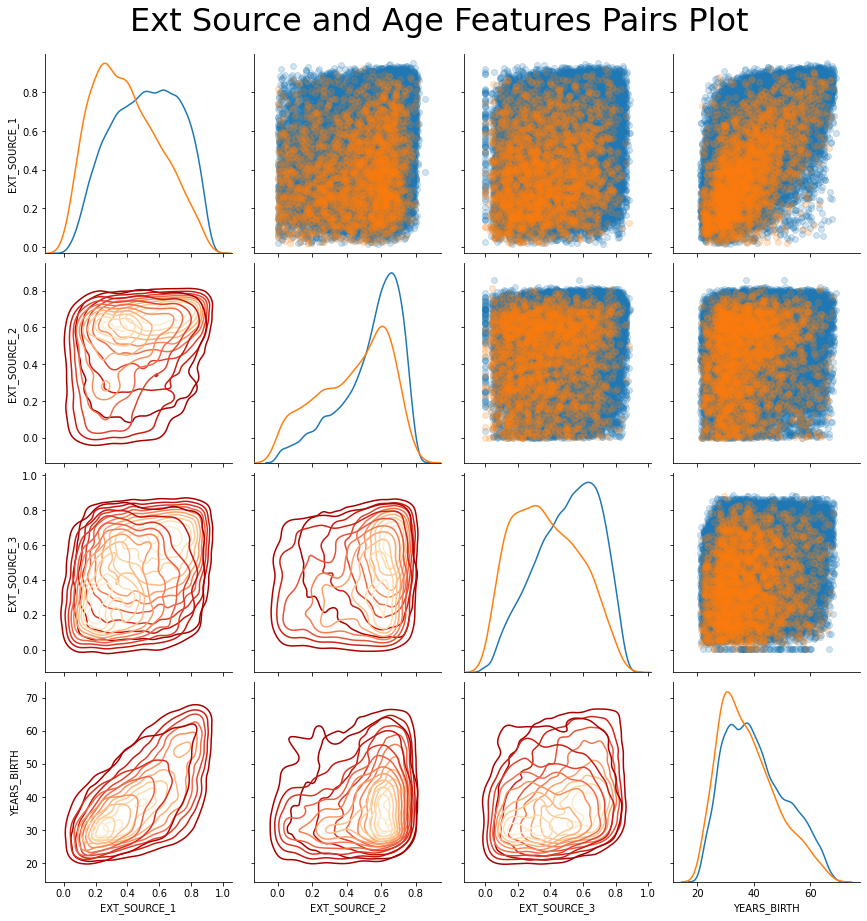

In [43]:
# Copy the data for plotting
plot_data = extract_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);
plt.show()


In this plot, the red indicates the defaulters and the blue are non defaulters. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the EXT_SOURCE_1 and the DAYS_BIRTH (or equivalently YEARS_BIRTH), indicating that this feature may take into account the age of the client. 

## EDA PREVIOUS DATA

#### DATA CLEANING AND MANIPULATION

In [44]:
prevdata['DAYS_DECISION']=abs(prevdata['DAYS_DECISION'])

In [45]:
prevdata['CNT_PAYMENT']=prevdata['CNT_PAYMENT'].astype('Int64')

In [46]:
prevdata['DAYS_FIRST_DRAWING']=abs(prevdata['DAYS_FIRST_DRAWING']).astype('Int64')

In [47]:
prevdata['DAYS_FIRST_DUE']=abs(prevdata['DAYS_FIRST_DUE']).astype('Int64')

In [48]:
prevdata['DAYS_LAST_DUE_1ST_VERSION']=abs(prevdata['DAYS_LAST_DUE_1ST_VERSION']).astype('Int64')

In [49]:
prevdata['DAYS_LAST_DUE']=abs(prevdata['DAYS_LAST_DUE']).astype('Int64')

In [50]:
prevdata['DAYS_TERMINATION']=abs(prevdata['DAYS_TERMINATION']).astype('Int64')

In [51]:
prevdata['NFLAG_INSURED_ON_APPROVAL']=prevdata['NFLAG_INSURED_ON_APPROVAL'].astype('Int64')

In [52]:
#missing values and percentage of missing values previous application data
result = prevdata.isnull().sum().sort_values(ascending = False)
result=result[result>0]
percent = (prevdata.isnull().sum()/prevdata.isnull().count()*100).sort_values(ascending = False)
percent=percent[percent>0]
prevdata_missing  = pd.concat([result, percent], axis=1, keys=['Result', 'Percent'])
prevdata_missing

,Result,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


Now in order to see relation between 'Target' & the 'previous application data', target variable is merged with previous data to easily build insights.

In [53]:
# Merging target variable to previous application data to analyse w.r.t target column
combined = pd.merge(prevdata,appdata[['SK_ID_CURR','TARGET']],on='SK_ID_CURR',how='left')
combined.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12,middle,POS mobile with interest,365243,42,300,42,37,0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36,low_action,Cash X-Sell: low,365243,134,916,365243,365243,1,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,high,Cash X-Sell: high,365243,271,59,365243,365243,1,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12,middle,Cash X-Sell: middle,365243,482,152,182,177,1,0.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24,high,Cash Street: high,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0


##### CORRELATIONS

Finding correlation with respect to TARGET variable and extracting the most effecting ones.

In [54]:
# correlation of each column w.r.t TARGET variable
prevdata_correlation = combined.dropna().corr()['TARGET'].sort_values()
prevdata_correlation

HOUR_APPR_PROCESS_START     -0.312709
RATE_DOWN_PAYMENT           -0.208604
SK_ID_PREV                  -0.145268
SK_ID_CURR                  -0.101389
AMT_APPLICATION             -0.087447
AMT_GOODS_PRICE             -0.087447
AMT_CREDIT                  -0.082849
DAYS_DECISION               -0.082480
AMT_ANNUITY                 -0.081377
AMT_DOWN_PAYMENT            -0.077335
SELLERPLACE_AREA            -0.049108
RATE_INTEREST_PRIVILEGED     0.021305
DAYS_LAST_DUE_1ST_VERSION    0.086131
DAYS_TERMINATION             0.105433
NFLAG_INSURED_ON_APPROVAL    0.105478
DAYS_LAST_DUE                0.120414
RATE_INTEREST_PRIMARY        0.121805
DAYS_FIRST_DUE               0.567948
TARGET                       1.000000
NFLAG_LAST_APPL_IN_DAY            NaN
CNT_PAYMENT                       NaN
DAYS_FIRST_DRAWING                NaN
Name: TARGET, dtype: float64

In [55]:
# Extracting top most columns which are negatively effecting target correlation
extract_prev = combined[['TARGET','DAYS_FIRST_DUE','HOUR_APPR_PROCESS_START','RATE_DOWN_PAYMENT','AMT_APPLICATION']]
extract_prev_corr = extract_prev.dropna().corr()
extract_prev_corr

,TARGET,DAYS_FIRST_DUE,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,AMT_APPLICATION
TARGET,1.000000,0.011909,-0.024774,-0.022424,-0.027968
DAYS_FIRST_DUE,0.011909,1.000000,0.004207,-0.029853,-0.004790
HOUR_APPR_PROCESS_START,-0.024774,0.004207,1.000000,0.034666,0.027343
RATE_DOWN_PAYMENT,-0.022424,-0.029853,0.034666,1.000000,-0.093442
AMT_APPLICATION,-0.027968,-0.004790,0.027343,-0.093442,1.000000


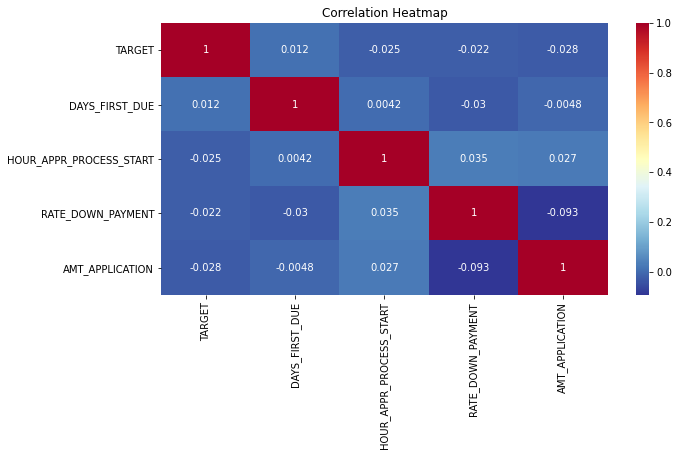

In [56]:
# Heatmap of above correlation
plt.figure(figsize=[10,5])
sns.heatmap(data=extract_prev_corr,annot=True,cmap = plt.cm.RdYlBu_r)
plt.title('Correlation Heatmap')
plt.show()

From the above heat map, it is understood that DAYS_FIRST_DUE is positively correlated with TARGET indicating that there is some positive relationship with the first due date. Others are negatively related leading to default but effect is very less or negligible.

#### Analysing each extracted column with high correlation

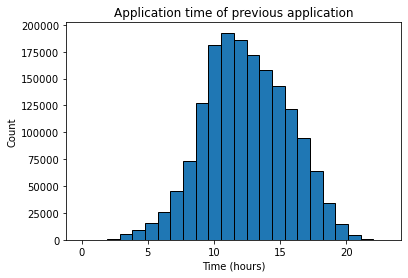

In [57]:
# Histogram showing the hours at which the process starts
plt.hist(combined['HOUR_APPR_PROCESS_START'].dropna(), edgecolor = 'k', bins = 24)
plt.title('Application time of previous application'); plt.xlabel('Time (hours)'); plt.ylabel('Count');
plt.show()


The hours at which the process starts. Maximum client's have applied peviously for the application in between 9a.m. to 4p.m.

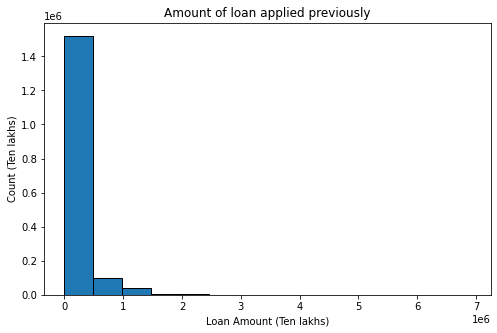

In [58]:
# Histogram showing the Loan Amount 
plt.figure(figsize = (8, 5))
plt.hist(combined['AMT_APPLICATION'].dropna(), edgecolor = 'k', bins = 14)
plt.title('Amount of loan applied previously'); plt.xlabel('Loan Amount (Ten lakhs)'); plt.ylabel('Count (Ten lakhs)');
plt.show()


Most of the client's previously applied for a loan amount of 5 lakh or less. Clients with more than 5 lakh loan amount are too less.

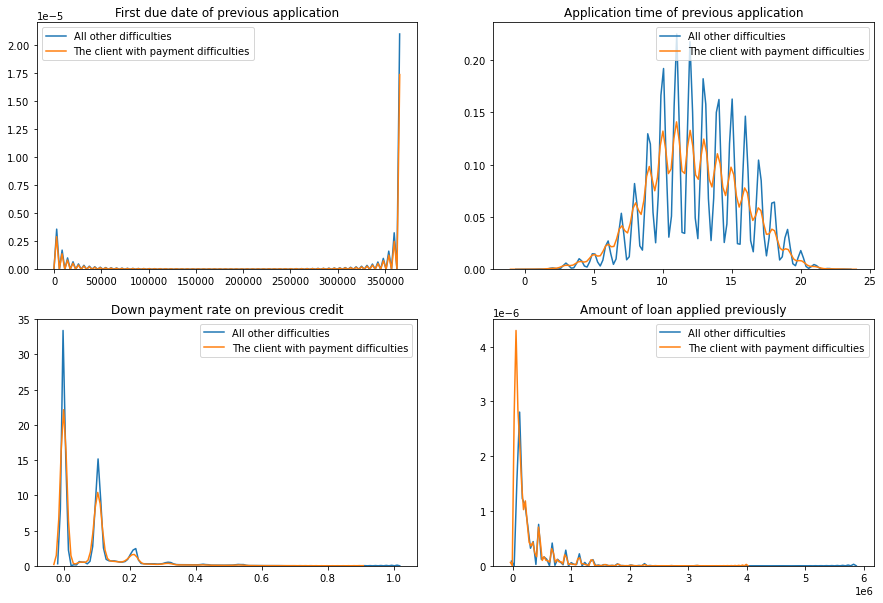

In [59]:
plt.figure(figsize = (15, 10))
plt.subplot(221)
# KDE plot of loans that were repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 0, 'DAYS_FIRST_DUE'],label='All other difficulties')
# KDE plot of loans which were not repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 1, 'DAYS_FIRST_DUE'],label = 'The client with payment difficulties')
plt.title('First due date of previous application')

plt.subplot(222)
# KDE plot of loans that were repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 0, 'HOUR_APPR_PROCESS_START'],label='All other difficulties')
# KDE plot of loans which were not repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 1, 'HOUR_APPR_PROCESS_START'],label = 'The client with payment difficulties')
plt.title('Application time of previous application')

plt.subplot(223)
# KDE plot of loans that were repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 0, 'RATE_DOWN_PAYMENT'],label='All other difficulties')
# KDE plot of loans which were not repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 1, 'RATE_DOWN_PAYMENT'],label = 'The client with payment difficulties')
plt.title('Down payment rate on previous credit')

plt.subplot(224)
# KDE plot of loans that were repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 0, 'AMT_APPLICATION'],label='All other difficulties')
# KDE plot of loans which were not repaid on time
sns.kdeplot(combined.loc[combined['TARGET'] == 1, 'AMT_APPLICATION'],label = 'The client with payment difficulties')
plt.title('Amount of loan applied previously')

plt.show()

These attributes are the most related to "TARGET" variable. Looking into these plots we can see that almost each of them has similar effect on 'TARGET' variable irrespective of target=0 or target=1. Only the magnitude varies as there is difference in no. of clients with target 0/1 but the curve & the frequencies are exactly same.


From this we can say that previous application data has negligible effect on whether the applicant is defaulter or not on the other hand current client data is affecting the target and is mainly used for determining defaulter.

### CONCLUSION 

In this case study, we will applied the techniques of Exploratory Data Analysis and also develop a basic understanding of risk analytics in banking and financial services and understand how client data is used to minimise the risk of losing money while lending to customers.

We first made sure to understand the data, our task, and the metric by which our submissions will be judged. Then, we performed a fairly simple EDA to try and identify relationships, trends, or anomalies that may help our analysis.

Once the data preparation, data exploration and data visualisation was complete, we concluded few points :
1. Data dipicting whether the applicant is defaulter or not, is seen more in application data ass compared to previous application data. 
2. The driver variables we came across are 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_FIRST_DUE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'AMT_APPLICATION'.
3. These driver variables are analysed w.r.t 'TARGET' variable and the effect is seen clearly in the above case study.